# Loading Data

In [17]:
using DataFrames
using CSV

In [2]:
df = CSV.File("data/anscombe.csv") |> DataFrame

,x1,x2,x3,x4,y1,y2,y3,y4
,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Float64
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.1,8.84,7.04
7,6,6,6,8,7.24,6.13,6.08,5.25
8,4,4,4,19,4.26,3.1,5.39,12.5
9,12,12,12,8,10.84,9.13,8.15,5.56


In [3]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,x1,9.0,4,9.0,14,0,Int64
2,x2,9.0,4,9.0,14,0,Int64
3,x3,9.0,4,9.0,14,0,Int64
4,x4,9.0,8,8.0,19,0,Int64
5,y1,7.50091,4.26,7.58,10.84,0,Float64
6,y2,7.50091,3.1,8.14,9.26,0,Float64
7,y3,7.5,5.39,7.11,12.74,0,Float64
8,y4,7.50091,5.25,7.04,12.5,0,Float64


In [4]:
describe(df, :mean, :std)

,variable,mean,std
,Symbol,Float64,Float64
1,x1,9.0,3.31662
2,x2,9.0,3.31662
3,x3,9.0,3.31662
4,x4,9.0,3.31662
5,y1,7.50091,2.03157
6,y2,7.50091,2.03166
7,y3,7.5,2.03042
8,y4,7.50091,2.03058


In [5]:
nrow(df), ncol(df)

(11, 8)

In [6]:
size(df)

(11, 8)

In [7]:
extrema([[12, 2, 5, 7] [2, 4, 5, 6]])

(2, 12)

In [11]:
select(df, r"x")

,x1,x2,x3,x4
,Int64,Int64,Int64,Int64
1,10,10,10,8
2,8,8,8,8
3,13,13,13,8
4,9,9,9,8
5,11,11,11,8
6,14,14,14,8
7,6,6,6,8
8,4,4,4,19
9,12,12,12,8


In [12]:
Matrix(select(df, r"x"))

11×4 Matrix{Int64}:
 10  10  10   8
  8   8   8   8
 13  13  13   8
  9   9   9   8
 11  11  11   8
 14  14  14   8
  6   6   6   8
  4   4   4  19
 12  12  12   8
  7   7   7   8
  5   5   5   8

In [13]:
xlim = collect(extrema(Matrix(select(df, r"x"))) .+ (-1, 1))

2-element Vector{Int64}:
  3
 20

In [14]:
ylim = collect(extrema(Matrix(select(df, r"y"))) .+ (-1, 1))

2-element Vector{Float64}:
  2.1
 13.74

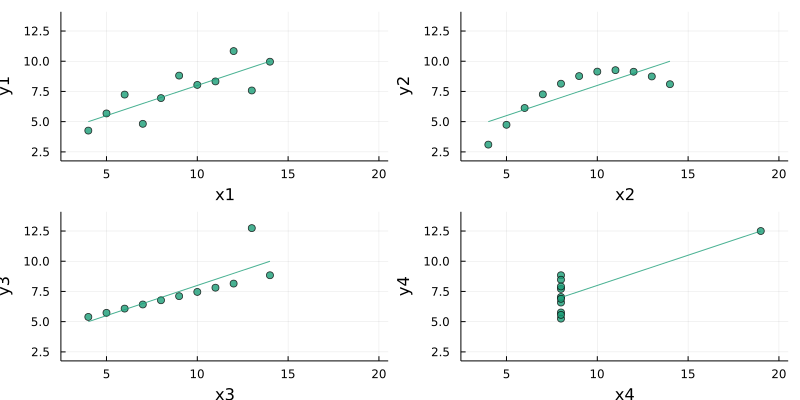

In [20]:
using RDatasets
using StatsPlots

plot_array = Any[]

for i in 1:4
    x_vals = df[:, "x$i"]
    y_vals = df[:, "y$i"]
    
    p = plot( x_vals, y_vals,
              seriestype=:scatter,
              xlabel="x$i", ylabel="y$i",
              xlims=xlim, ylims=ylim,
              smooth=true,
              opacity=0.8, palette = :Dark2_5,  
    )
    push!(plot_array, p)  
end
plot(plot_array..., layout = (2, 2), legend = false, size = (800, 400))

# Loading dataset from RDatasets

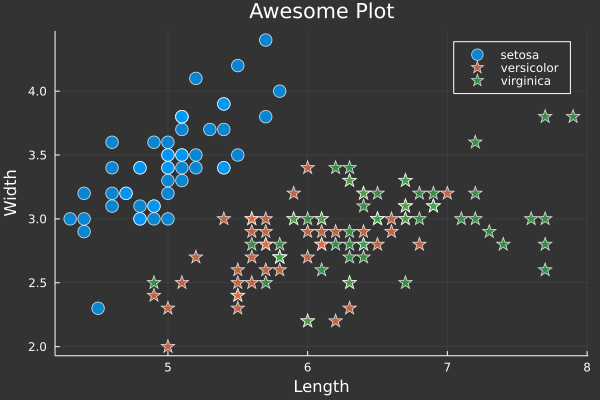

In [42]:
using RDatasets
using StatsPlots
iris = dataset("datasets", "iris")

@df iris scatter(
    :SepalLength,
    :SepalWidth,
    group = :Species,
    title = "Awesome Plot",
    xlabel = "Length",
    ylabel = "Width",
    m = (0.8, [:circle :star :star5], 7),
    bg = RGB(0.2,0.2,0.2)
)

In [ ]:
describe(iris)